In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.text import *

path = "/content/drive/My Drive/DATA-475/imdb"

In [ ]:
# create TextLMDataBunch using the csv in path
#     remember to specify the text column
# data_lm = ...
data_lm = TextLMDataBunch.from_csv(
    path,
    "train.csv",
    text_cols="review"
)

In [ ]:
# create TextClasDataBunch using the csv in path
#     remember to specify the text/label column
#     specify test dataset, vocab, and bs
# data_clas = ...
data_clas = TextClasDataBunch.from_csv(
    path,
    "train.csv",
    text_cols="review",
    label_cols="sentiment",
    vocab=data_lm.train_ds.vocab,
    bs=32,
)

In [ ]:
# create language model learner with AWD_LSTM architecture and drop_mult of 0.5
# lm_learner = ...
lm_learner = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 4.79E-03


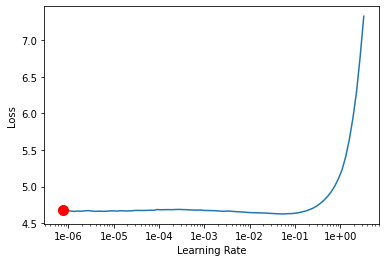

In [ ]:
# find a learing rate
lm_learner.lr_find()
lm_learner.recorder.plot(suggestion=True)

In [ ]:
# fit one cycle
lr = lm_learner.recorder.min_grad_lr
lm_learner.fit_one_cycle(2, lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.667805,4.477382,0.263375,04:24
1,4.707440,4.475968,0.263494,04:24


In [ ]:
# save the encoder
# save the encoder
lm_learner.save_encoder("model")

In [ ]:
lm_learner.predict("this movie talks about Canadian", n_words=20)

'this movie talks about Canadian government agency with a long - running controversy over its controversial diplomatic aspects . The official Canadian media'

In [ ]:
clas_learner = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)
clas_learner.load_encoder("model")

RNNLearner(data=TextClasDataBunch;

Train: LabelList (19999 items)
x: TextList
xxbos i am the parent of a special needs child and i enjoyed the the movie very much ! xxmaj it was loving , warm and fun . i learned a long time ago to see the humor in things . i especially thought it was sweet how all the other characters worried about xxmaj frankie and who would take care of him after his grandmother died . i attended a focus screening of the film with other parents and siblings of special needs children before the film was edited . xxmaj everyone enjoyed the film and it actually inspired wonderful discussions . xxmaj we talked about how our kids make us laugh and we also talked about how we worry about them . xxmaj the screenwriter talked about how she work with autistic children and other special needs children as a volunteer for several years . xxmaj she based the character on a real person . xxmaj our family is blessed with a sense of humor that has gotten us through some very stress

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 2.51E-02


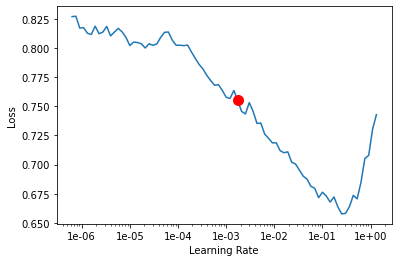

In [ ]:
# tune the text_classifier_learner to accpetable accuracy (>80%)
clas_learner.lr_find()
clas_learner.recorder.plot(suggestion=True)

In [ ]:
lr = clas_learner.recorder.min_grad_lr
clas_learner.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.482679,0.405969,0.811638,01:45
1,0.462334,0.394338,0.821236,01:59
2,0.453742,0.373236,0.834633,01:39
3,0.443628,0.365234,0.838432,02:00


In [38]:
clas_learner.predict("This is a horrible movie.")

(Category tensor(1), tensor(1), tensor([0.3501, 0.6499]))

In [39]:
clas_learner.predict("This is a great movie,")

(Category tensor(1), tensor(1), tensor([1.3781e-04, 9.9986e-01]))

In [40]:
# Check the label mapping
# suppose it returns {'negative': 0, 'positive': 1}
data_clas.train_ds.y.c2i

{'negative': 0, 'positive': 1}

In [41]:
import pandas as pd


df = pd.read_csv(path+"/test.csv")
y_true = tensor(df["sentiment"]=="positive")

In [48]:
interp = TextClassificationInterpretation.from_learner(
    clas_learner, 
    ds_type=DatasetType.Test  ## test removed 
)
interp.y_true = tensor(df["sentiment"]=="positive")
interp.plot_confusion_matrix()

AttributeError: ignored

In [45]:
from fastai.metrics import accuracy

In [46]:
accuracy(interp.preds, interp.y_true)

RuntimeError: ignored